In [1]:
import sys
import matplotlib.pyplot as plt

In [2]:
# highly dependent on specific output format from data.sh
# not at all flexible 
def parsedata(filename):
    
    # create list of tuple w/ coordinates for graph
    f = open(filename, "r")
    scale_vs_itercount, scale_vs_exectime = [], []
    p1, p2 = [0.0, 0.0], [0.0, 0.0]
    for line in f.readlines():
        line = line.split()
        if line[0] == "SCALE:":         # scale 
            p1[0] = float(line[1])
            p2[0] = float(line[1])
        if line[0].isnumeric():        # iteration count
            p2[1] = float(line[0])
        if line[0] == "Average":       # average execution time
            p1[1] = float(line[2])
            scale_vs_exectime.append(tuple(p1))
            scale_vs_itercount.append(tuple(p2))
    
    f.close()
    return scale_vs_exectime, scale_vs_itercount

In [3]:
def graph(gs_et, gs_i, jc_et, jc_i):
    # decompose into x and y coordinates
    gsetX = [p[0] for p in gs_et]
    gsetY = [p[1] for p in gs_et]
    jcetX = [p[0] for p in jc_et]
    jcetY = [p[1] for p in jc_et]
    gsiX = [p[0] for p in gs_i]
    gsiY = [p[1] for p in gs_i]
    jciX = [p[0] for p in jc_i]
    jciY = [p[1] for p in jc_i]
    
    
    # two graphs, add scatter plots
    figure, axis = plt.subplots(1, 2)
    axis[0].scatter(gsetX, gsetY)
    axis[0].scatter(jcetX, jcetY)
    axis[0].set_title("Scale vs. Avg. Exec. Time")
    axis[1].scatter(gsiX, gsiY)
    axis[1].scatter(jciX, jciY)
    axis[1].set_title("Scale vs. Iteration Count")
    

In [12]:
def calculate_speedup_ku(gs_et, gs_i, jc_et, jc_i):
    # decompose into x and y coordinates
    gsetX = [p[0] for p in gs_et]
    gsetY = [p[1] for p in gs_et]
    jcetX = [p[0] for p in jc_et]
    jcetY = [p[1] for p in jc_et]
    gsiX = [p[0] for p in gs_i]
    gsiY = [p[1] for p in gs_i]
    jciX = [p[0] for p in jc_i]
    jciY = [p[1] for p in jc_i]
    
    # create new list with speedups 
    scale = [17,18,19,20,21,22,23,24,25,26,27,28]
    et_speedup, it_speedup = [], []
    for i in range(0, len(gs_et)):
        et_speedup.append(jc_et[i][1] / gs_et[i][1])
        it_speedup.append(jc_i[i][1] / gs_i[i][1])
    fig1, fig2 = plt.figure(), plt.figure()
    ax1, ax2 = fig1.add_axes([0,0,1,1]), fig2.add_axes([0,0,1,1])

    ax1.bar(scale,et_speedup)
    ax1.set_title("Execution Time Speedup (Old / New) Higher Is Better - Urand")
    ax1.set_xlabel("Scale (2^n nodes in graph)")
    ax2.bar(scale,it_speedup)
    ax2.set_title("Old Iter Count / New Iter Count")
    ax2.set_xlabel("Scale (2^n nodes in graph)")
    plt.show()
    

In [9]:
def calculate_speedup_rw(gs_et, gs_i, jc_et, jc_i):
    # decompose into x and y coordinates
    gsetX = [p[0] for p in gs_et]
    gsetY = [p[1] for p in gs_et]
    jcetX = [p[0] for p in jc_et]
    jcetY = [p[1] for p in jc_et]
    gsiX = [p[0] for p in gs_i]
    gsiY = [p[1] for p in gs_i]
    jciX = [p[0] for p in jc_i]
    jciY = [p[1] for p in jc_i]
    
    
    et_speedup, it_speedup = [], []
    for i in range(0, len(gs_et)):
        et_speedup.append(jc_et[i][1] / gs_et[i][1])
        it_speedup.append(jc_i[i][1] / gs_i[i][1])
    
    graphlabels = ['Road', 'Twitter', 'Web']
    fig1, fig2 = plt.figure(), plt.figure()
    ax1, ax2 = fig1.add_axes([0,0,1,1]), fig2.add_axes([0,0,1,1])

    ax1.bar(graphlabels, et_speedup)
    ax1.set_title("Execution Time Speedup (Old / New)  RW Graphs")
    ax2.bar(graphlabels,it_speedup)
    ax2.set_title("Old Iter Count / New Iter Count RW Graphs")
    plt.show()
    

In [10]:
def parse_loopchunk_data(filename):
    twitter, web, road = dict(), dict(), dict()
    tt, ww, rr = True, False, False
    f = open(filename)
    size, exectime = 0, 0
    for line in f.readlines():
        linelist = line.split()
        
        # twitter
        if len(linelist) > 1 and linelist[0] == 'GRAPH:' and linelist[1] == 'twitter.sg':
            tt, ww, rr = True, False, False
            size = int(linelist[3])
        elif tt and len(linelist) > 1 and linelist[0] == 'Average':
            exectime = float(linelist[2])
            twitter[size] = exectime
        # web
        if len(linelist) > 1 and linelist[0] == 'GRAPH:' and linelist[1] == 'web.sg':
            tt, ww, rr = False, True, False
            size = int(linelist[3])
        elif ww and len(linelist) > 1 and linelist[0] == 'Average':
            exectime = float(linelist[2])
            web[size] = exectime
        # road
        if len(linelist) > 1 and linelist[0] == 'GRAPH:' and linelist[1] == 'road.sg':
            tt, ww, rr = False, False, True
            size = int(linelist[3])
        elif rr and len(linelist) > 1 and linelist[0] == 'Average':
            exectime = float(linelist[2])
            road[size] = exectime
            
    f.close()
    
    #print("TWITTER DICTIONARY:")
    #print(twitter)
    #print("WEB DICTIONARY:")
    #print(web)
    #print("ROAD DICTIONARY:")
    #print(road)
    
    return twitter, web, road

def linegraphloopchunk(twitter, web, road):
    plt.plot(twitter.keys(), twitter.values(), label="twitter.sg")
    plt.plot(web.keys(), web.values(), label="web.sg")
    plt.plot(road.keys(), road.values(), label="road.sg")
    #plt.set_xscale('log', basex=2)
    plt.semilogx()
    plt.legend()
    plt.xlabel("Loop Chunk Size")
    plt.ylabel("Execution Time (seconds)")
    plt.title("Loop Chunk Size vs. Execution Time (seconds)")
    
    
    

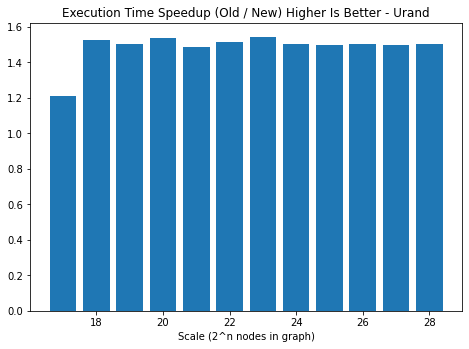

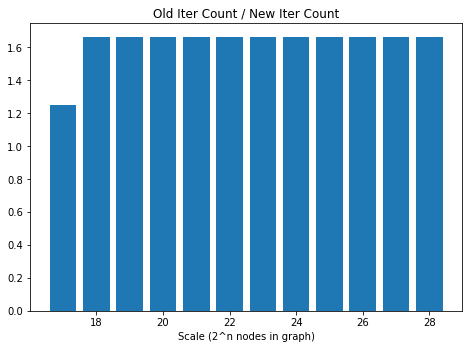

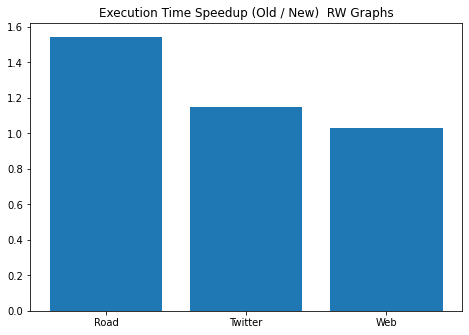

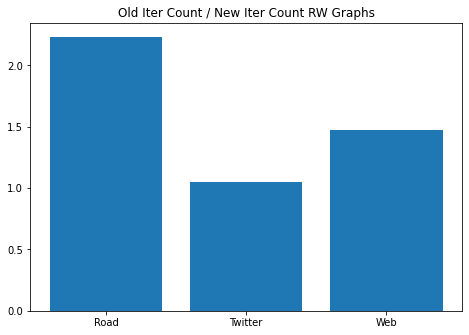

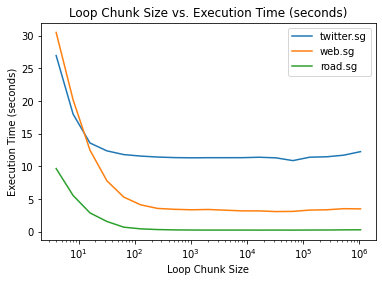

In [13]:
def main():
    
    ### Kron/Urand
    #gs_kr_et, gs_kr_i = parsedata("output/run.sh-results/GS-kron-24.out")
    #jc_kr_et, jc_kr_i = parsedata("output/run.sh-results/J-kron-24.out")
    gs_ur_et, gs_ur_i = parsedata("output/run.sh-results/GS-urand-24.out")
    jc_ur_et, jc_ur_i = parsedata("output/run.sh-results/J-urand-24.out")
    
    ### Realworld Graphs (in the order: road, twitter, web)
    gs_rw_et, gs_rw_i = parsedata("output/run.sh-results/GS-rwg-24.out")
    jc_rw_et, jc_rw_i = parsedata("output/run.sh-results/J-rwg-24.out")
    
    
    ### graph Kron/Urand data
    #graph(gs_et, gs_i, jc_et, jc_i)
    #calculate_speedup_ku(gs_kr_et, gs_kr_i, jc_kr_et, jc_kr_i)
    calculate_speedup_ku(gs_ur_et, gs_ur_i, jc_ur_et, jc_ur_i)

    ### graph Real World Graph data
    calculate_speedup_rw(gs_rw_et, gs_rw_i, jc_rw_et, jc_rw_i)
    
    ### loop chunk line plot
    t, w, r = parse_loopchunk_data("output/loopchunk.sh-results/GS-rw-24.out")
    linegraphloopchunk(t, w, r)
    
    
    
    
if __name__ == "__main__":
    main()